# ImageDataGenerator
- 학습시 모델에 Image dataset을 제공하는 파이프라인 Generator
    - Image 데이터들을 Network(모델)에 배치단위로 제공한다.
    - Image Augmentation(이미지증식)등의 전처리를 적용한 Image를 Network(모델)에 제공 할 수 있다.
- 데이터 전체가 순환되어 배치 생성을 끝없이 함
    - https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
#제너레이터에서 만약 [1,2,3]이 있다고 한다면 3이 끝나고 1로 다시 돌아와서 이를 계속 반복

## ImageDataGenerator()
- 매개변수: 이미지 증식(augmentation) 관련 설정을 정의
    - **fill_mode**: 이동이나 회전시 생기는 공간을 어떻게 채울 것인지 설정
        - nearest: 빈공간에 가장 가까운 pixel로 채우기 (1,2,3 [3],[3],[3])
        - reflect: 빈공간 근처 공간의 값을 거울로 반사되는 값들으로 채움. (1,2,3 [3],[2],[1])
        - constant: 지정한 값으로 채움. 기본은 0이고 특정값으로 채울때는 cval=100 으로 설정
    - Nomalization 설정
        - **rescale**: 지정한 값을 각 픽셀에 곱한다. (rescale=1/255.)
        - **featurewise_center=True**: channel의 평균을 pixel에서 빼서 평균을 0으로 표준화한다. (channl 별로 처리)
        - **featurewise_std_nomalization=True**: channel 별로 표준화한다. (평균 0, 표준편차 1)
    - 반전
         - **horizontal_flip=True**: 좌우반전, **vertical_flip=True**: 상하 반전
    - 회전(rotation)
         - **rotation_range**=정수:  -정수 ~ +정수 범위로 랜덤 회전 (rotation_rate=30 : -30 ~ +30도 사이에서 랜덤하게 회전)
    - 이동
         - **width_shift_range=실수**: 좌우이동, **height_shift_range=실수**: 상하 이동
         - 실수값: 이동범위지정.  0 ~ 1 이면 이미지 너비, 높이 기준 비율. 1이상이면 pixel.
    - Zoom 
         - **zoom_range**: 실수 또는 [lower, upper]
             - 실수: [1-실수값, 1+실수값]
             - 1미만이면 확대(zoom in), 1초과면 축소(zoom out)
    - shear(전단변환): 평행사변형 형태로 변환
        - **shear_range**: 실수 - 각도 지정
    - 명암 (brightness)
        - **brightness_range** : 실수값 2개를 가지는 튜플이나 리스트. 명암 범위
        - 1이 원본. 0에 가까우면 어둡고 1보타 크면 밝아진다. 
          
- flow들 메소드
    - ImageDataGenerator에 Image Data를 batch 단위로 공급하는 Iterator 생성

## ImageDataGenerator에 dataset을 제공하는 메소드

- ### flow_from_directory () 
    - 학습시 파일 경로에 저장된 디렉토리로 부터 이미지를 읽어와 변형 처리 후 모델(네트워크)에 제공하는 Iterator 생성.
    - 주요 매개변수
        - directory: 이미지 저장 경로 (이미지는 지정한 디렉토리내에 클래스 별로 디렉토리가 나눠져 저장되 있어야 한다. 오름차순으로 Label이 생성.),
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
    - 반환값
        - DirectoryIterator: batch size만큼 image와 label을 제공하는 Generator
    - 지정한 directory의 구조
![image.png](attachment:image.png)
    
    - 디렉토리 별로 class를 지정한다.
    - class 조회: `DirectoryIterator객체.class_indices.keys()`

- ### flow_from_dataframe()
    - 읽어올 파일의 경로와 label을 DataFrame으로 생성한 뒤 그것을 이용해 파일을 Loading한다.
    - dataframe
        - DataFrame: image 데이터의 절대경로와 label을 저장한 DataFrame객체
        - x_col: image경로 컬럼명
        - y_col: label 컬럼명
        - target_size: 이미지 크기. 지정한 크기로 resize한다. 기본값: (256,256)
        - color_mode: "grayscale", "rgb", "rgba" 중에 하나를 지정. 기본값: "rgb"
        - class_mode: 분류 종류 지정
            - 'binary' : binary class 분류
            - 'category' : multi class 분류. label(output)이 one hot encoding 된 경우 지정
            - 'sparse' : multi class 분류. label(output)이 label encoding 형식인 경우 지정
            - None: 기본값. 하위디렉토리로 추론
        - batch_size: 미니배치 사이즈 지정 (기본 : 32)
- ### flow()
    - ndarray 타입의 이미지를 받아서 처리. 
    - 주요 매개변수
        - x: input data. 4차원 배열(크기, height, width, channel)
        - y: labels. 
        - batch_size: 미니 배치 크기(기본값:32)
- ### 모델(네트워크)에서 fit() 호출하기 전까지는 preprocessing과 Data Loading이 실행되지 않는다.

## 흐름
![image.png](attachment:image.png)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img #읽어올때 pillow 객체로 읽어옴 
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import numpy as np

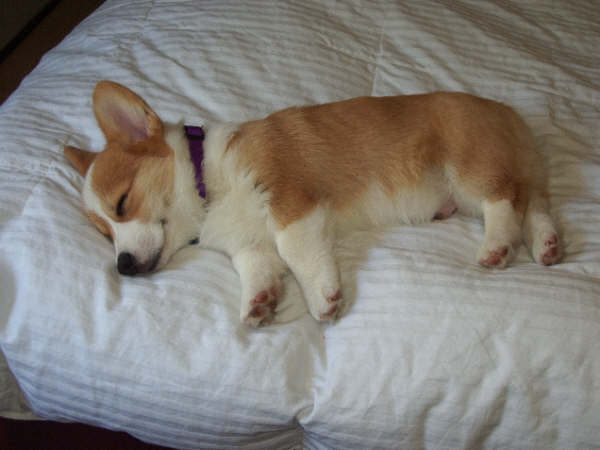

In [ ]:
img = load_img('./image.jpg')
img

In [ ]:
type(img) #Pillow Image 객체로 읽어들임. 

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
data = img_to_array(img) #Pillow 이미지를 ndarray로 변환

print(type(data), data.shape)

<class 'numpy.ndarray'> (450, 600, 3)


In [ ]:
#predict하려면 반드시 축을 다음과 같이 늘려야 함,
sample = data[np.newaxis, ...] #0번 더미 축을 추가 (개수를 표현 축)

sample.shape
#하나의 데이터가 (450,600,3) 구조로 되어있다.

(1, 450, 600, 3)

In [ ]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

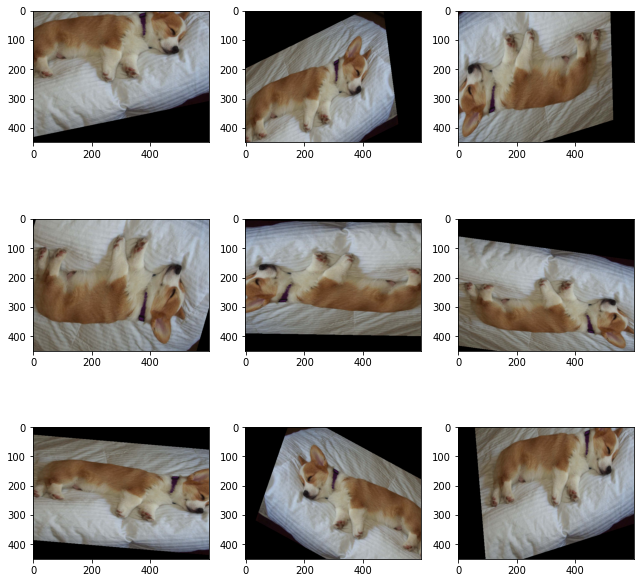

In [ ]:
# Generator 생성
datagen = ImageDataGenerator()
#datagen = ImageDataGenerator(rescale=1./255)
# 0.5 : -0.5 ~ +0.5 비율로 정의 /전체이미지 기준 0.5비율
#datagen = ImageDataGenerator(width_shift_range=0.5)#, fill_mode='constant')
# 30 : -30픽셀 ~+30 픽셀
# 리스트: 움직일 크기를 지정. 지정한 값들 중 하나가 임의로 선택
#30픽셀 범위 내에서
datagen = ImageDataGenerator(width_shift_range=30, fill_mode='constant')
#-200픽셀 +200픽셀 사이에서 움직
datagen = ImageDataGenerator(height_shift_range=[-200,200]) #고정
                                              #만약 [-200,200,100,130] 이러면 네개중 하나를 랜덤으로 선택
#평행사변형 모양으로 움직임
datagen = ImageDataGenerator(shear_range=40., fill_mode='constant')

#-40 ~ +40 이미지 회전
datagen = ImageDataGenerator(rotation_range=40, fill_mode='reflect')
#[1-0.2, 1+0.2] 줌인
datagen = ImageDataGenerator(zoom_range=0.2, fill_mode='constant')

datagen = ImageDataGenerator(shear_range=5, fill_mode='constant', cval=255) #255 흰색

#0.3에서 1.3사이의 값을 가짐 명도조절
datagen = ImageDataGenerator(brightness_range=(0.3,1.3))

#좌우반전
datagen = ImageDataGenerator(horizontal_flip=True)

#위아래반전
datagen = ImageDataGenerator(vertical_flip=True)

datagen = ImageDataGenerator(rotation_range=20,  #+-20
                             width_shift_range=0.2, 
                             height_shift_range=0.2,
                             zoom_range=0.3,
                             shear_range=20,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='constant'
                             )
#이상치 같은 것들이 많은 경우 조절해줘야 함. #개처럼 안보이는 사진

fig = plt.figure(figsize=(9,9))
iterator = datagen.flow(sample, batch_size=1)

for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next() #다음 배치
    img = batch[0].astype('uint8') #uint8 이렇게 해야 이미지 나옴
    plt.imshow(img)

plt.tight_layout()
plt.show()    

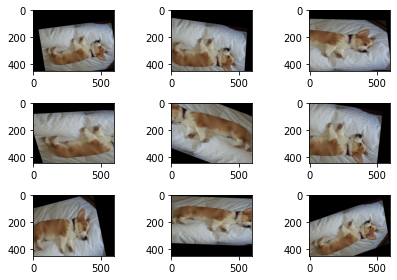

In [ ]:

datagen = ImageDataGenerator(shear_range=5, fill_mode='constant', cval=255) #255 흰색


for i in range(9):
    plt.subplot(3,3,i+1)
    batch = iterator.next() #다음 배치
    img = batch[0].astype('uint8') #uint8 이렇게 해야 이미지 나옴
    plt.imshow(img)

plt.tight_layout()
plt.show()    